In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import lib.io.stan
from lib.preprocess.envelope import *
import os

# Patient AC

In [ ]:
# Load the simulated data
sim_data = np.load('datasets/id001_ac/AC_syn_tvb_ez=59_pz=82-74.npz')

# Plot the data and choose window of seizure for fitting
pz_x0 = sim_data['pz_x0']
pz_kplng = sim_data['pz_kplng']
pz = np.append(pz_x0,pz_kplng)
ez = sim_data['ez']
seeg = sim_data['seeg'].T
# seegn = (seeg - np.min(seeg,1)[:,np.newaxis]) / (np.max(seeg,1) - np.min(seeg,1))[:,np.newaxis]
src_sig = sim_data['src_sig'][:,0,:,0] + sim_data['src_sig'][:,3,:,0]
time_steps = sim_data['time_steps']
nn = src_sig.shape[1]
ns = seeg.shape[1]

start_idx = 2200
end_idx = 3800

plt.figure(figsize=(20,15))
plt.subplot(121)
for roi in range(nn):
#     plt.plot(time_steps[start_idx:end_idx],src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (EZ)',alpha=0.7)
    if(roi in ez):
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0,color='xkcd:red', label='EZ')
    elif(roi in pz):
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0, label = 'PZ')
    else:
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0,'xkcd:black',label='')
plt.yticks(np.r_[0:2*nn:2],np.r_[0:nn])
# for roi in pz:
#     plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (PZ)',alpha=0.7)
plt.title("Source signal (x1+x2)",fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.legend()

plt.subplot(122)
np.random.seed(15)
plt_snsrs = np.random.choice(np.arange(ns),5)
for i,snsr in enumerate(plt_snsrs):
    plt.plot(i + seeg[start_idx:end_idx,snsr]/150.0,'k')
plt.title('SEEG')
plt.tight_layout()

plt.figure(figsize=(25,4))
for roi in range(nn):
    if(roi in ez):
        plt.plot(src_sig[start_idx:end_idx,roi],color='xkcd:red', label=str(roi+1)+' (EZ)', alpha=0.7)
    elif(roi in pz):
        plt.plot(src_sig[start_idx:end_idx,roi], label =str(roi+1)+' (PZ)', alpha=0.7)
plt.legend()
plt.title('Source signal(x1+x2)')


### Extract features for fitting

In [ ]:
roi = 10
# slice the data for one seizure
# seeg_sliced = seeg[start_idx:end_idx,:]
# plt.figure(figsize=(25,5))
# plt.plot(seeg_sliced[:,roi],'k');
# plt.title('SEEG')


seeg_lpwr = compute_fitting_target(seeg[start_idx:end_idx], 256)
# np.savez('results/exp10/AC_fit_trgt.npz', fit_trgt = seeg_lpwr)

# plt.figure(figsize = (25,4))
# plt.plot(seeg_lpwr[:-50,roi],'k')
# plt.title('SEEG log. Power')

plt.figure(figsize=(25,8))
for i,snsr in enumerate(plt_snsrs):
    plt.subplot(5,2,2*i+1)
    seegn = (seeg[start_idx:end_idx,snsr] - np.min(seeg[start_idx:end_idx,snsr]))/100.0 #/ (np.max(seeg[start_idx:end_idx,snsr]) - np.min(seeg[start_idx:end_idx,snsr]))
    plt.plot(seegn)
    plt.ylim([0,1.2])
    plt.subplot(5,2,2*i+2)
    plt.plot(seeg_lpwr[:,snsr])
    plt.ylim([-2, 10])


### Comparison of one channel's fitting feature with a 2D epileptor simulation
Note: This is just for comparison sake, some parameters still needs to be tuned for a better fit, which is what we hope fitting process would do

In [ ]:
sim_out = lib.io.stan.read_samples('tmp/tmp.csv',0,1,ignore_warmup=True)
x = sim_out['x'][0,...]
z = sim_out['z'][0,...]
t = np.load('results/exp10/AC_network.npz')
gain = t['gain_mat']
seeg_pred = sim_out['mu_seeg_log_power'][0,...]
# seeg_pred_ma = mov_avg(seeg_pred, 10)

amplitude = 0.5 #0.1
offset = 160 #210.0
plt.figure(figsize=(25,4))
plt.plot(amplitude*(seeg_pred[3500:5000,roi]+offset), 'b', label = 'prediction');
plt.plot(seeg_lpwr[:-10,roi], 'r', label='seeg_lpwr_ma')
# plt.plot(seeg_lpwr_f[:,roi], 'k', label = 'seeg_lpwr_f');
plt.legend()

## Patient CJ

In [ ]:
# Load the simulated data
sim_data = np.load('datasets/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

# Plot the data and choose window of seizure for fitting
pz_x0 = sim_data['pz_x0']
pz_kplng = sim_data['pz_kplng']
pz = np.append(pz_x0,pz_kplng)
ez = sim_data['ez']
seeg = sim_data['seeg'].T
src_sig = sim_data['src_sig'][:,0,:,0] + sim_data['src_sig'][:,3,:,0]
time_steps = sim_data['time_steps']

start_idx = 2500
end_idx = 4000

# plt.figure(figsize=(20,10))
# plt.subplot(211)
# for roi in ez:
#     plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (EZ)',alpha=0.7)
# for roi in pz:
#     plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (PZ)',alpha=0.7)
# plt.title("Source signal (x)",fontsize=15)
# plt.xlabel('Time',fontsize=12)
# plt.legend()

# plt.subplot(212)
# plt.plot(time_steps[start_idx:end_idx], seeg[start_idx:end_idx,:],'k',alpha = 0.3)
# plt.title("SEEG",fontsize=15)
# plt.xlabel('Time',fontsize=12)
# plt.tight_layout()

plt.figure(figsize=(20,15))
plt.subplot(121)
for roi in range(nn):
#     plt.plot(time_steps[start_idx:end_idx],src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (EZ)',alpha=0.7)
    if(roi in ez):
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0,color='xkcd:red', label='EZ')
    elif(roi in pz):
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0, label = 'PZ')
    else:
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0,'xkcd:black',label='')
plt.yticks(np.r_[0:2*nn:2],np.r_[0:nn])
# for roi in pz:
#     plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (PZ)',alpha=0.7)
plt.title("Source signal (x1+x2)",fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.legend()

plt.subplot(122)
# np.random.seed(150)
plt_snsrs = np.random.choice(np.arange(ns),5)
for i,snsr in enumerate(plt_snsrs):
    plt.plot(i + seeg[start_idx:end_idx,snsr]/100.0,'k')
plt.title('SEEG')
plt.tight_layout()

plt.figure(figsize=(25,4))
for roi in range(nn):
    if(roi in ez):
        plt.plot(src_sig[start_idx:end_idx,roi],color='xkcd:red', label=str(roi+1)+' (EZ)', alpha=0.7)
    elif(roi in pz):
        plt.plot(src_sig[start_idx:end_idx,roi], label =str(roi+1)+' (PZ)', alpha=0.7)
plt.legend()
plt.title('Source signal(x1+x2)')


In [ ]:
roi = 0
# # slice the data for one seizure
# seeg_sliced = seeg[start_idx:end_idx,:]
# plt.figure(figsize=(25,5))
# plt.plot(seeg_sliced[:,roi],'k');
# plt.title('SEEG')


seeg_lpwr = compute_fitting_target(seeg[start_idx:end_idx], 256)
# np.savez('results/exp10/CJ_fit_trgt.npz', fit_trgt = seeg_lpwr)

# plt.figure(figsize = (25,4))
# plt.plot(seeg_lpwr[:-50,roi],'k')
# plt.title('SEEG log. Power')

plt.figure(figsize=(25,8))
for i,snsr in enumerate(plt_snsrs):
    plt.subplot(5,2,2*i+1)
    seegn = (seeg[start_idx:end_idx,snsr] - np.min(seeg[start_idx:end_idx,snsr]))/100.0 #/ (np.max(seeg[start_idx:end_idx,snsr]) - np.min(seeg[start_idx:end_idx,snsr]))
    plt.plot(seegn)
    plt.ylim([0,1.5])
    plt.subplot(5,2,2*i+2)
    plt.plot(seeg_lpwr[:,snsr])
    plt.ylim([-2, 10])

# Patient ID001_BT

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan
from lib.preprocess.envelope import *
import os

/home/anirudh/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


Text(0.5, 1.0, 'Source signal(x1+x2)')

/home/anirudh/anaconda3/envs/python3.6/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/anirudh/anaconda3/envs/python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


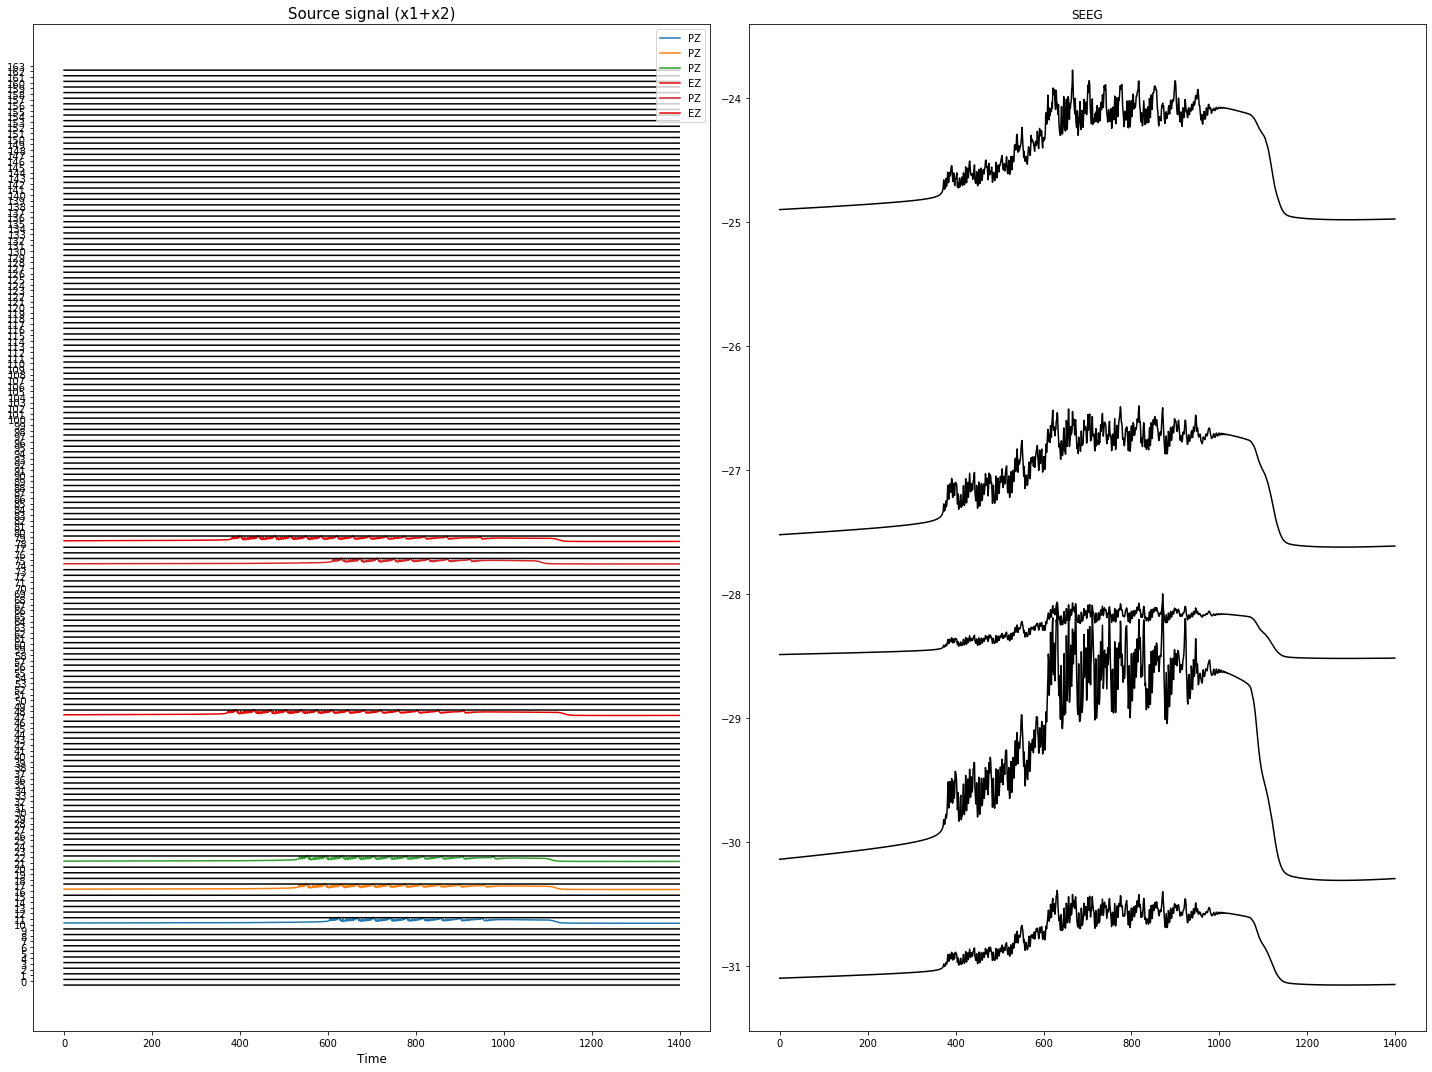

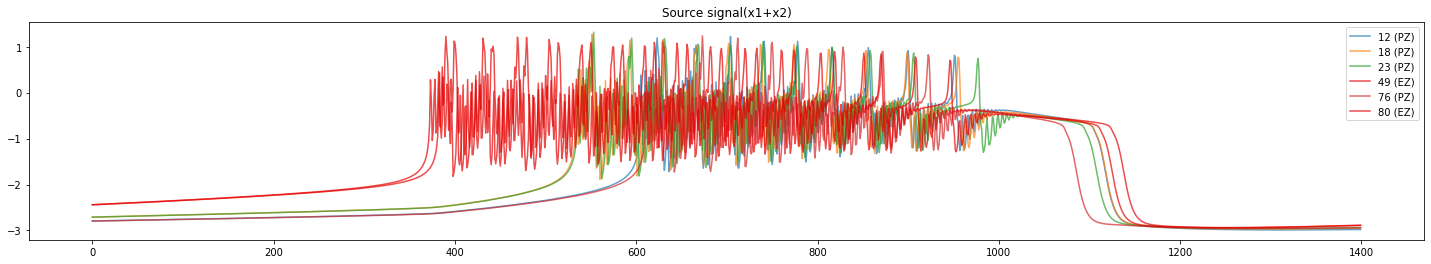

In [2]:
data_dir = 'datasets/syn_data/id001_bt'
results_dir = 'datasets/syn_data/id001_bt'

# Load the simulated data
sim_data = np.load(os.path.join(data_dir, 'syn_tvb_ez=48-79_pz=11-17-22-75.npz'))

# Plot the data and choose window of seizure for fitting
pz = sim_data['pz']
ez = sim_data['ez']
seeg = sim_data['seeg'].T
# seegn = (seeg - np.min(seeg,1)[:,np.newaxis]) / (np.max(seeg,1) - np.min(seeg,1))[:,np.newaxis]
src_sig = sim_data['src_sig'][:,0,:,0] + sim_data['src_sig'][:,3,:,0]
time_steps = sim_data['time_steps']
nn = src_sig.shape[1]
ns = seeg.shape[1]

start_idx = 800
end_idx = 2200

plt.figure(figsize=(20,15))
plt.subplot(121)
for roi in range(nn):
#     plt.plot(time_steps[start_idx:end_idx],src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (EZ)',alpha=0.7)
    if(roi in ez):
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0,color='xkcd:red', label='EZ')
    elif(roi in pz):
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0, label = 'PZ')
    else:
        plt.plot(2*roi + src_sig[start_idx:end_idx,roi]/2.0,'xkcd:black',label='')
plt.yticks(np.r_[0:2*nn:2],np.r_[0:nn])
# for roi in pz:
#     plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (PZ)',alpha=0.7)
plt.title("Source signal (x1+x2)",fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.legend()

plt.subplot(122)
np.random.seed(15)
plt_snsrs = np.random.choice(np.arange(ns),5)
for i,snsr in enumerate(plt_snsrs):
    plt.plot(i + seeg[start_idx:end_idx,snsr]/10,'k')
plt.title('SEEG')
plt.tight_layout()

plt.figure(figsize=(25,4))
for roi in range(nn):
    if(roi in ez):
        plt.plot(src_sig[start_idx:end_idx,roi],color='xkcd:red', label=str(roi+1)+' (EZ)', alpha=0.7)
    elif(roi in pz):
        plt.plot(src_sig[start_idx:end_idx,roi], label =str(roi+1)+' (PZ)', alpha=0.7)
plt.legend()
plt.title('Source signal(x1+x2)')


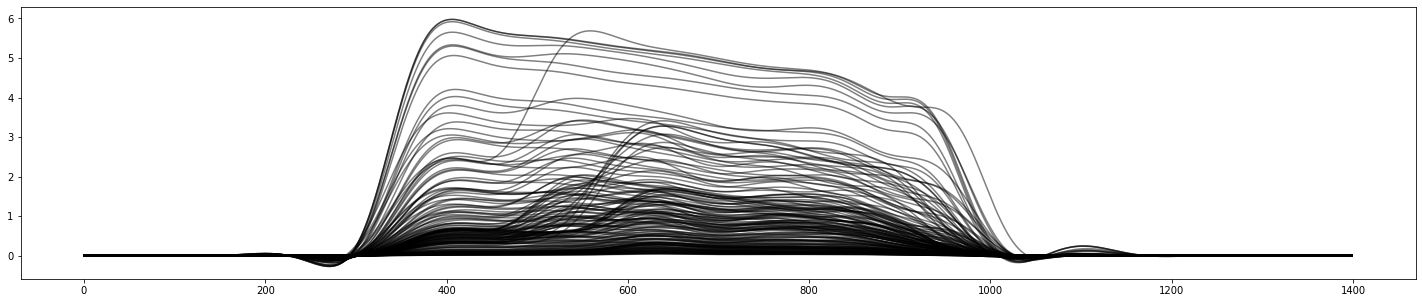

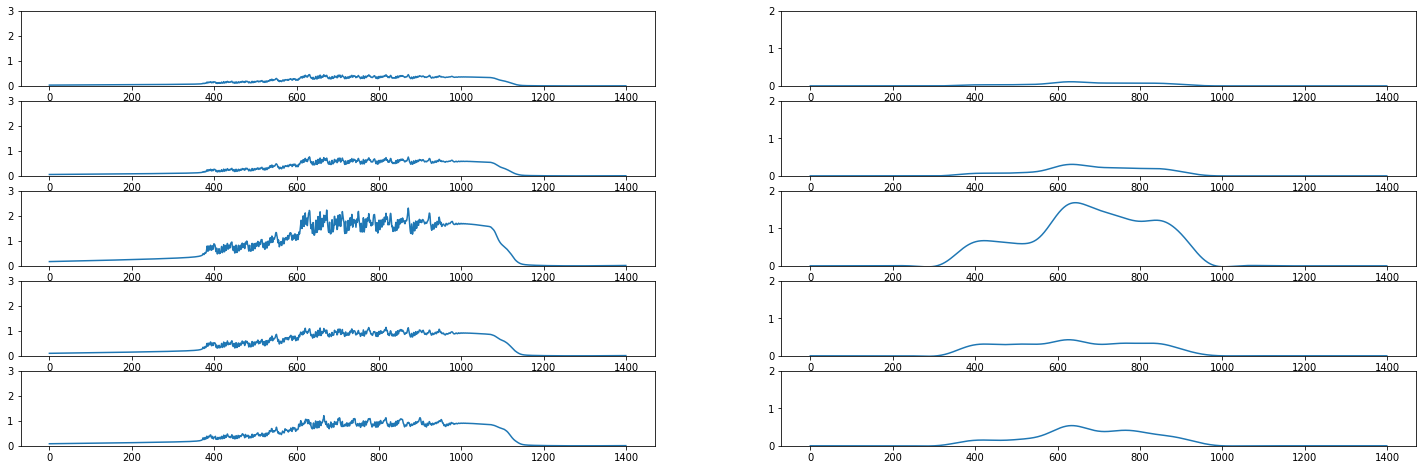

In [4]:
# roi = 0
# # slice the data for one seizure
# seeg_sliced = seeg[start_idx:end_idx,:]
# plt.figure(figsize=(25,5))
# plt.plot(seeg_sliced[:,roi],'k');
# plt.title('SEEG')


seeg_lpwr = compute_fitting_target(seeg[start_idx:end_idx], samp_rate=256, win_len=50, hpf=10.0, lpf=2.0, logtransform=True)

np.savez(os.path.join(results_dir, 'fit_trgt.npz'), fit_trgt = seeg_lpwr)

plt.figure(figsize=(25,5))
plt.plot(seeg_lpwr, 'k', alpha=0.5)

plt.figure(figsize=(25,8))
for i,snsr in enumerate(plt_snsrs):
    plt.subplot(5,2,2*i+1)
    seegn = (seeg[start_idx:end_idx,snsr] - np.min(seeg[start_idx:end_idx,snsr]))/10.0 #/ (np.max(seeg[start_idx:end_idx,snsr]) - np.min(seeg[start_idx:end_idx,snsr]))
    plt.plot(seegn)
    plt.ylim([0,3])
    plt.subplot(5,2,2*i+2)
    plt.plot(seeg_lpwr[:,snsr])
    plt.ylim([0, 2])

In [ ]:
data = seeg[start_idx:end_idx, plt_snsrs]
win_len = 50
logtransform = True
data_hpf = bfilt(data, samp_rate=256, fs=10, mode='highpass', axis=0)
plt.figure(figsize=(25,5))
plt.plot(data_hpf);

# compute the log power over a sliding window
data_mov_avg = mov_avg(data_hpf**2, win_len) + 1
plt.figure(figsize=(25,5))
plt.plot(data_mov_avg);


data_lpwr = np.log(data_mov_avg) if logtransform else mov_avg(
                               data_hpf**2, win_len)
plt.figure(figsize=(25,5))
plt.plot(data_lpwr);

# low pass filter the log power for smoothing
data_lpwr = bfilt(data_lpwr, samp_rate=256, fs=2.0, mode='lowpass', axis=0)
plt.figure(figsize=(25,5))
plt.plot(data_lpwr);